## ------------- Business Objective :- To create customer cluster to identify the type of customer  ---------------

## Importing Libraries

In [286]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.cluster import KMeans
from pandas_profiling import ProfileReport
from sklearn.metrics import silhouette_samples,silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
from warnings import filterwarnings
filterwarnings('ignore')

In [287]:
sb.set_theme(style="darkgrid")
sb.set(rc={'figure.facecolor':'skyblue'})

In [288]:
data1=pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [289]:
data1.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
35,36,Female,21,33,81
113,114,Male,19,64,46
1,2,Male,21,15,81
104,105,Male,49,62,56
177,178,Male,27,88,69


In [290]:
data=data1

In [291]:
data.duplicated().sum()

0

In [292]:
def data_description(data):
    print("shape of dataset---",data.shape)
    print()
    print("size of dataset----",data.size)
    print()
    print("dimension of dataset-----",data.ndim)
    print()
    print(data.columns)
    print()
    print(data.dtypes)

In [293]:
data_description(data)

shape of dataset--- (200, 5)

size of dataset---- 1000

dimension of dataset----- 2

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [294]:
a=data.select_dtypes(exclude="object")
b=data.select_dtypes(include="object")
a.head(2)
b.head(2)
a_lst=list(a.columns)
b_lst=list(b.columns)

print(tabulate({"categorical":b_lst, "numeric":a_lst},headers=["categorical","continuous"]))

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81


,Gender
0,Male
1,Male


categorical    continuous
-------------  ----------------------
Gender         CustomerID
               Age
               Annual Income (k$)
               Spending Score (1-100)


In [295]:
for i in b_lst:
    g=data[i].value_counts()
    print("-------------------------------------------------",i,"----------------------------------------------")
    print(g)
    print("--------------------------------------------------------------------------------------------------------")

------------------------------------------------- Gender ----------------------------------------------
Female    112
Male       88
Name: Gender, dtype: int64
--------------------------------------------------------------------------------------------------------


In [296]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [297]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


---------------------------------------------------------------------------------------------------------------------------

# Visulalization

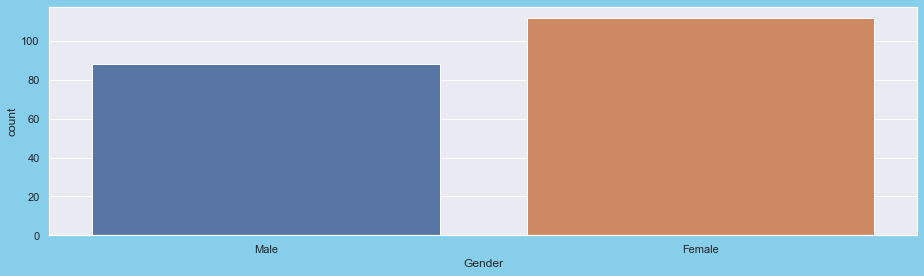

In [298]:
plt.figure(figsize=(13,4))
sb.countplot(data['Gender'])
plt.show();

#### Female customer are more than the male customer

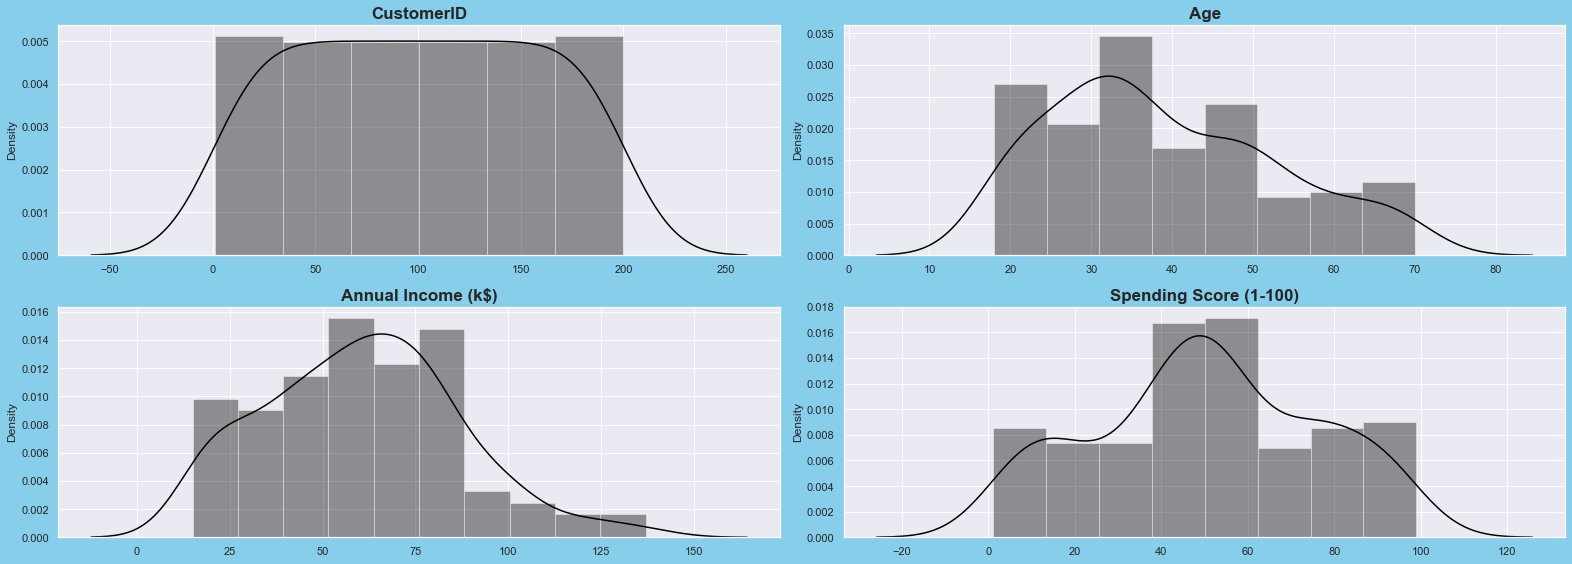

In [299]:
t=1
plt.figure(figsize=(22,8))
for i in a_lst:
    plt.subplot(2,2,t)
    sb.distplot(x=data[i],color="black")
    plt.title(i,fontweight="bold",fontsize=17)
    t=t+1
    plt.tight_layout()
plt.show();

- in the shopping mall, 200 customer are there
- maximum customer's age range is from 30 to 40
- maximum customer' annual salary is between 50-87 k$
- maximum customer's spending score is between 40 to 60

### Age distribution of gender

In [300]:
def hist_bi(col1,col2):
    plt.figure(figsize=(17,5))
    sb.histplot(x=data[col1],hue=data[col2])
    c=col1+" VS "+col2
    plt.xlabel(col1)
    plt.title(c,fontsize=15,fontweight="bold")
    

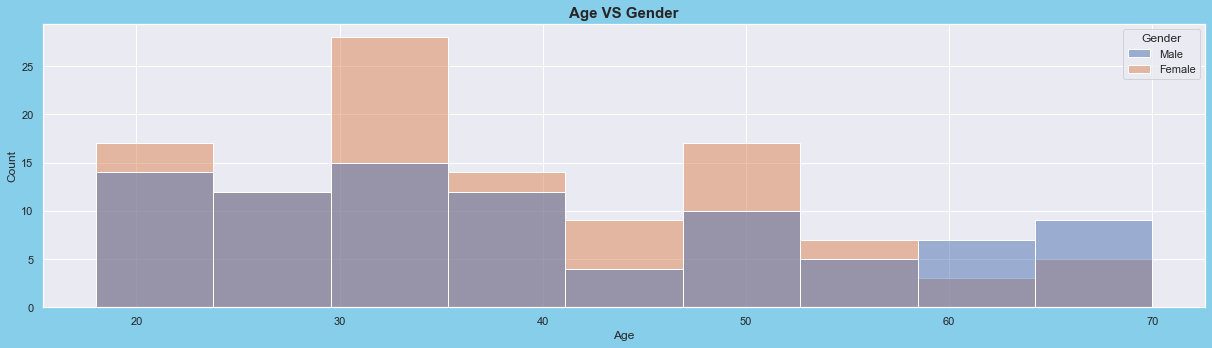

In [301]:
##sb.histplot(x=data['Age'],hue=data['Gender'])
hist_bi('Age','Gender')

### Maximum  male and females customers are 30 to 40 aged

## AGE VS INCOME

In [302]:
def scatter_bi(col1,col2):
    plt.figure(figsize=(17,5))
    sb.scatterplot(data[col1],data[col2])
    c=col1+" VS "+col2
    plt.xlabel(col1)
    plt.title(c,fontsize=15,fontweight="bold")
    

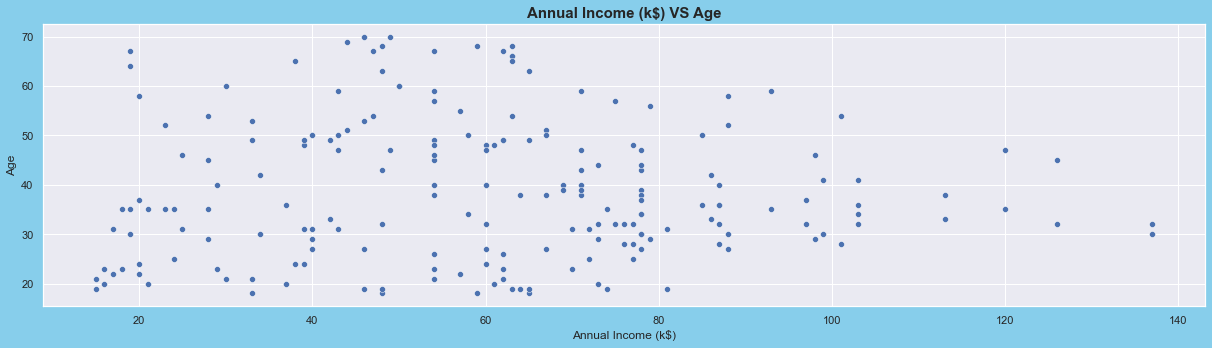

In [303]:
scatter_bi('Annual Income (k$)','Age')


- generally the all customer who's annual income is between 40-70 ,they are all intersted in shopping
- the customer whose annual salary is between 15 to 40k $ and age below 50 are more interested

-  the customer whose annual salary is greater than 80k $ and age between 30 -45  are more interested

## Annual income vs spending score

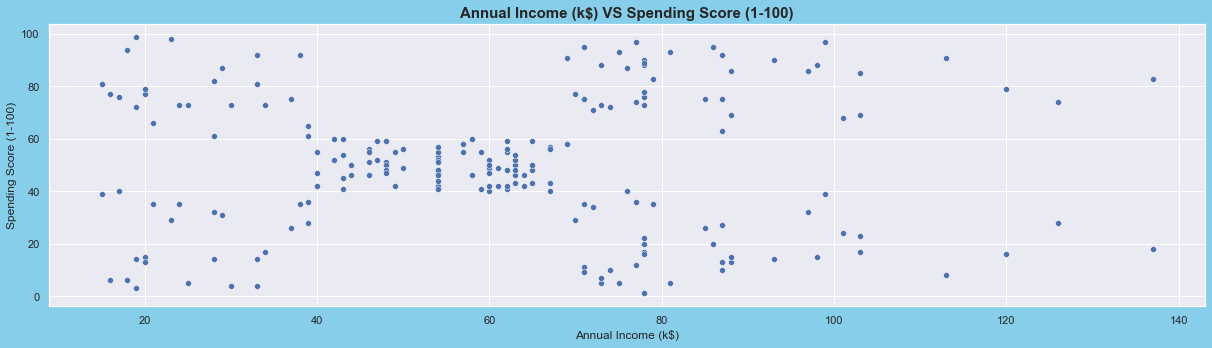

In [304]:
scatter_bi('Annual Income (k$)','Spending Score (1-100)')

#### the maximum customer are having annual income 40 -70 k and spending score 40-60

## Gender wise annual income vs spending score

In [305]:
def scatter_mul(col1,col2,col3):
    plt.figure(figsize=(17,5))
    sb.scatterplot(data[col1],data[col2],hue=data[col3])
    c=col3+" wise "+col1+" VS "+col2
    plt.xlabel(col1)
    plt.title(c,fontsize=15,fontweight="bold")

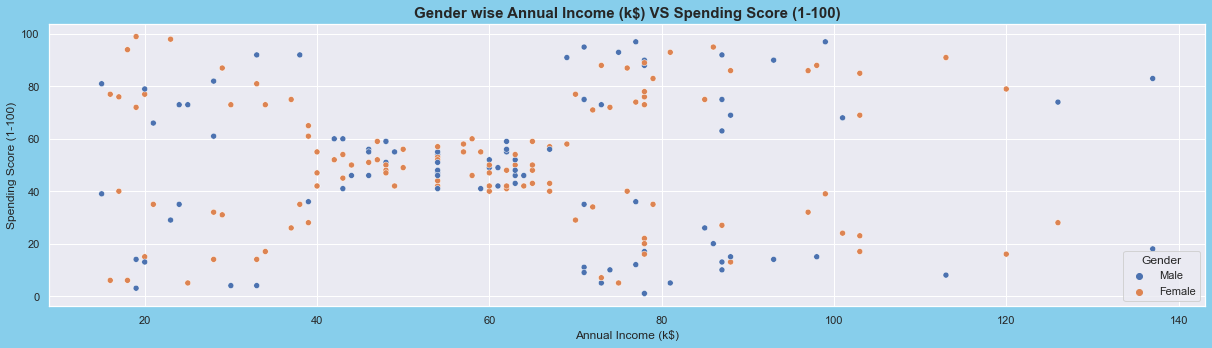

In [306]:
scatter_mul('Annual Income (k$)','Spending Score (1-100)','Gender')

#### based on annual income and spending score there are five type of customer


### Gender wise annual income vs age

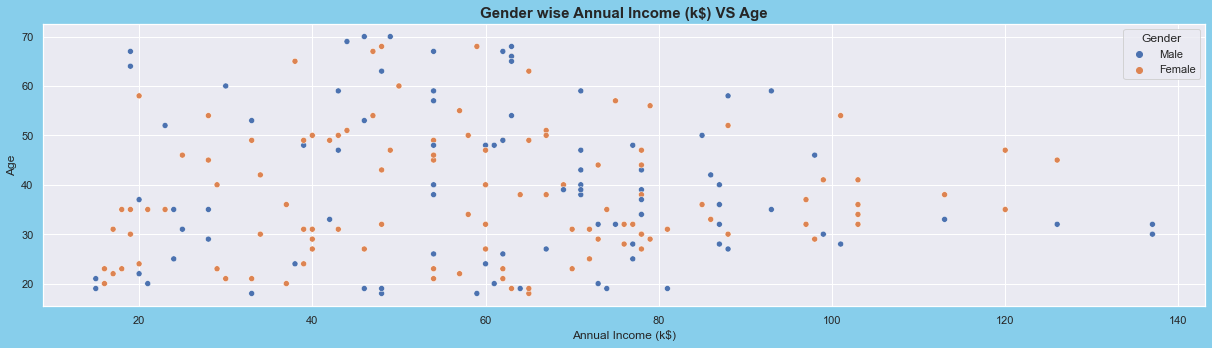

In [307]:
scatter_mul('Annual Income (k$)','Age','Gender')

#### genreally all ages male and female customer whose income is between 40-80k are more interested in shopping

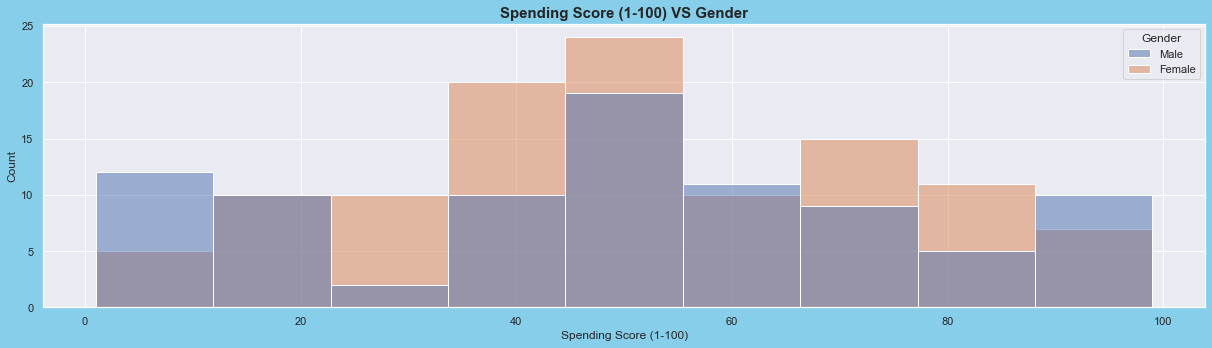

In [308]:
hist_bi('Spending Score (1-100)','Gender')


#### females's spending score is more than male

### CONCLUSION:-

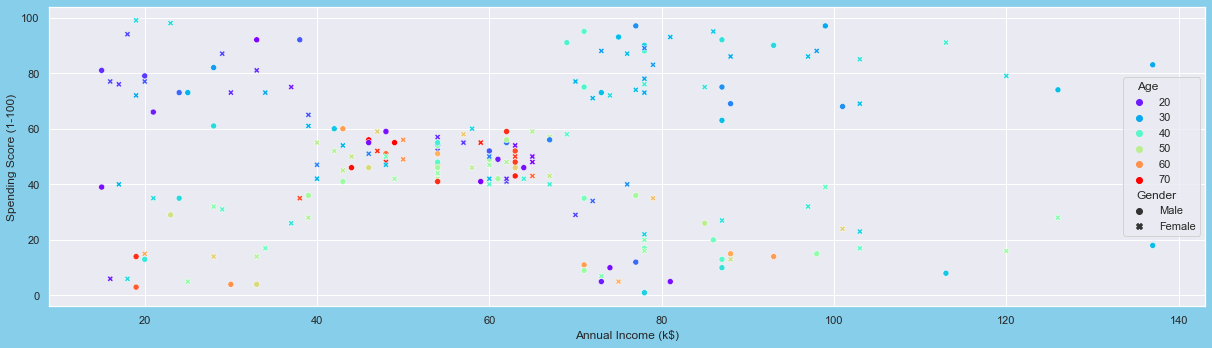

In [309]:
plt.figure(figsize=(17,5))
sb.scatterplot(data['Annual Income (k$)'],data['Spending Score (1-100)'],hue=data['Age'],style=data['Gender'],palette="rainbow")
plt.show();

#### - there are five type of customers
  - type 1 customers are those whose income is low (15-40) and spending score is low(5-40)
  - type 2 customers are those whose income is low (15-40) and spending score is high(60-100)
  - type 3 customers are those whose income is medium (40-80) and spending score is medium(40-60)
  - type 4 customers are those whose income is high (grater than 70) and spending score is low(less than 40)
  - type 4 customers are those whose income is high (grater than 70) and spending score is high(greater than 60)
  
#### females customers are more then male
#### maximum customer's  age are from  30-40 year old

-----------------------------------------------------------------------------------------------------------------------------

In [310]:
data=data1.copy()
data.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [311]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [312]:
##labelencoder=preprocessing.LabelEncoder()
##data["Gender_encode"]=labelencoder.fit_transform(data['Gender'])

In [313]:
##data.head(2)

In [314]:
data=data.drop(['Gender','CustomerID'],axis=1)

In [315]:
scalar=StandardScaler()
data_scaled=pd.DataFrame(scalar.fit_transform(data),columns=data.columns)

In [316]:
data_scaled.head(2)

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704


In [317]:
data.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [318]:
x=data_scaled
x.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [319]:
cluster_labels

array([-1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  1,  2,  1,  0,  1,  2,  2,  2,  1,
        2,  2,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  2,  1,  1,
        2,  2,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  2,
        1,  1,  2, -1,  1,  1,  2,  1,  1,  2,  2,  1,  2,  1,  2,  2,  1,
        1,  2,  1,  2,  1,  1,  1,  1,  1,  2,  1,  2,  2,  2,  1,  1,  1,
        1,  2, -1, -1,  3,  2,  3,  1,  3, -1,  3, -1,  3,  2,  3, -1,  3,
       -1,  3, -1,  3, -1,  3, -1,  3, -1,  3,  1,  3, -1,  3, -1,  3, -1,
        3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3,
       -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,
        3, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [320]:
distorsions=[]
silhouette_avg1=["-"]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k,random_state=0)
    cluster_labels=kmeans.fit_predict(x)
    distorsions.append(kmeans.inertia_)
    if k>1:
        silhouette_avg1.append(silhouette_score(x,cluster_labels))

In [321]:
performance=pd.DataFrame()
performance["error"]=distorsions
performance["silhoutte_score"]=silhouette_avg1
performance["clusters no"]=list(range(1,10))
performance=performance.set_index("clusters no")
performance

,error,silhoutte_score
clusters no,,
1,600.000000,-
2,389.386189,0.335472
3,295.456245,0.357923
4,205.225147,0.403958
5,168.247580,0.416643
6,133.888870,0.426855
7,117.169115,0.422419
8,103.944236,0.409842
9,93.614553,0.408354


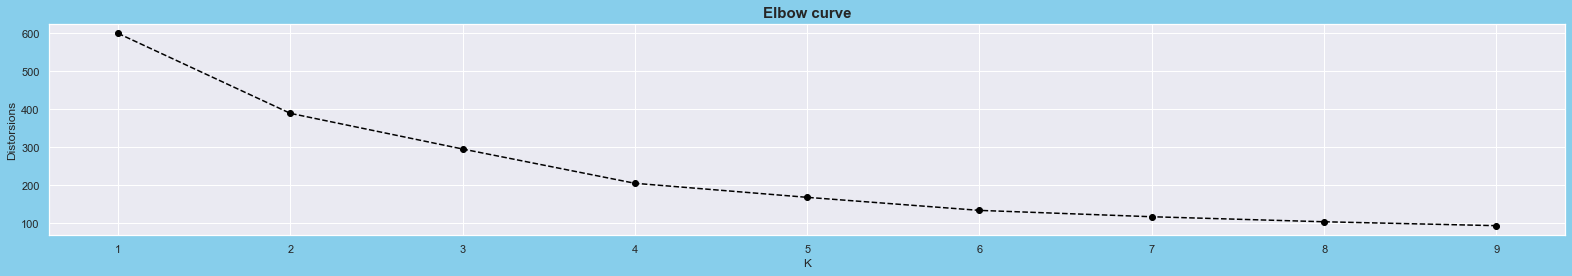

In [322]:
fig = plt.figure(figsize=(22,4))
plt.plot(range(1,10), distorsions,ls="--",marker="o",color="black")
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve',fontweight="bold",fontsize=15);
plt.show();

<Figure size 1080x360 with 0 Axes>

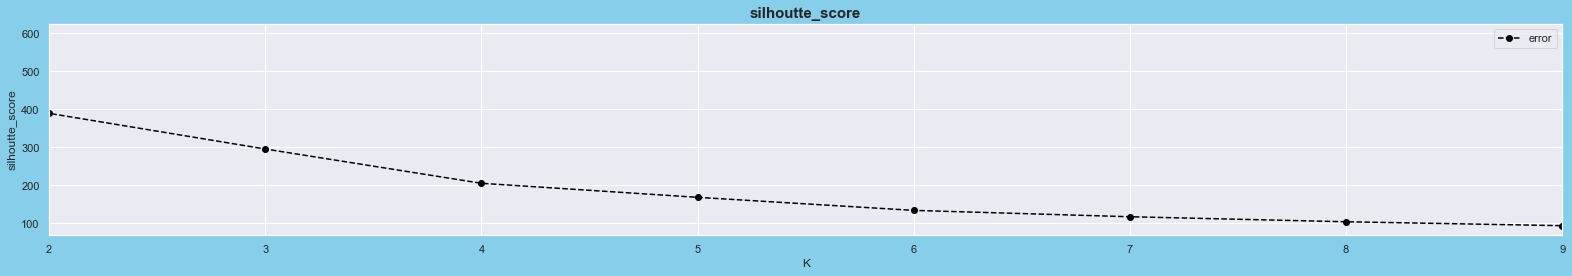

In [323]:
fig = plt.figure(figsize=(15, 5))
performance.plot(xlim=[2,9],figsize=(22,4),ls="--",c="black",marker="o")
plt.grid(True)
plt.xlabel('K')
plt.ylabel('silhoutte_score')
plt.title('silhoutte_score',fontweight="bold",fontsize=15);
plt.show();

For n_clusters = 2 The average silhouette_score is : 0.33547192894004574
For n_clusters = 3 The average silhouette_score is : 0.35880977401117803
For n_clusters = 4 The average silhouette_score is : 0.4039582785148566
For n_clusters = 5 The average silhouette_score is : 0.41664341513732767
For n_clusters = 6 The average silhouette_score is : 0.42742814991580175
For n_clusters = 7 The average silhouette_score is : 0.417231894954916


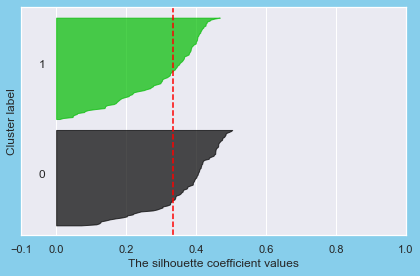

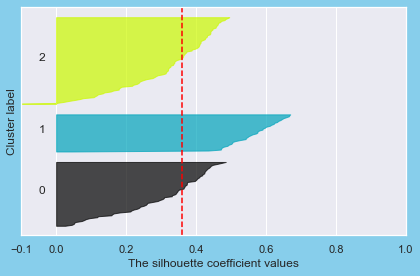

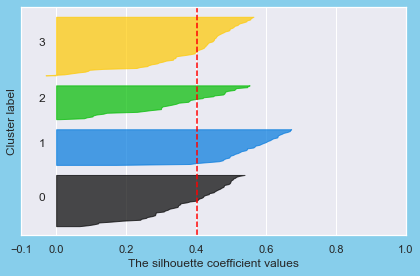

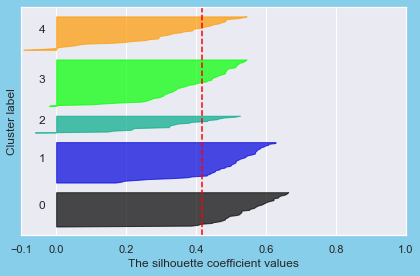

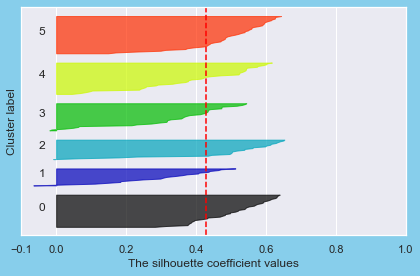

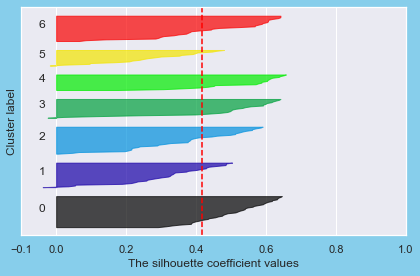

In [324]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(x, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
     # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show();

### Optimak k is 4

In [325]:
kmeans=KMeans(n_clusters=4,random_state=0)
y_pred_kmean=kmeans.fit_predict(x)
y_pred_kmean

array([1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 2, 1, 1, 1, 3, 3, 3, 3, 1, 2, 0, 0, 2, 0, 2, 0, 3, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [326]:
kmeans_df=pd.concat([data1,pd.DataFrame(y_pred_kmean)],axis=1)
kmeans_df=kmeans_df.rename(columns={0:"cluster number"})
kmeans_df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster number
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1


In [327]:
kmeans_df_all=kmeans_df
kmeans_df_all.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster number'],
      dtype='object')

In [328]:
##kmeans_df.drop(['CustomerID','Gender'],axis=1,inplace=True)

In [329]:
kmeans_df0=kmeans_df[kmeans_df["cluster number"]==0]
kmeans_df1=kmeans_df[kmeans_df["cluster number"]==1]
kmeans_df2=kmeans_df[kmeans_df["cluster number"]==2]
kmeans_df3=kmeans_df[kmeans_df["cluster number"]==3]

In [330]:
print("----------------------------------------------------------1st Cluster statistics----------------------------------------------------")
kmeans_df0.describe().T
print("----------------------------------------------------------2nd Cluster statistics----------------------------------------------------")
kmeans_df1.describe().T
print("----------------------------------------------------------3rd Cluster statistics----------------------------------------------------")
kmeans_df2.describe().T
print("----------------------------------------------------------4th Cluster statistics----------------------------------------------------")
kmeans_df3.describe().T

----------------------------------------------------------1st Cluster statistics----------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
CustomerID,40.0,161.025,23.338630,123.0,141.50,161.0,180.5,200.0
Age,40.0,32.875,3.857643,27.0,30.00,32.0,36.0,40.0
Annual Income (k$),40.0,86.100,16.339036,69.0,74.75,78.5,94.0,137.0
Spending Score (1-100),40.0,81.525,9.999968,58.0,74.00,83.0,90.0,97.0
cluster number,40.0,0.000,0.000000,0.0,0.00,0.0,0.0,0.0


----------------------------------------------------------2nd Cluster statistics----------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
CustomerID,57.0,53.438596,36.936730,1.0,21.0,48.0,88.0,121.0
Age,57.0,25.438596,5.707193,18.0,21.0,24.0,31.0,38.0
Annual Income (k$),57.0,40.000000,17.031483,15.0,24.0,40.0,57.0,67.0
Spending Score (1-100),57.0,60.298246,18.434212,6.0,48.0,56.0,73.0,99.0
cluster number,57.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


----------------------------------------------------------3rd Cluster statistics----------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
CustomerID,38.0,160.552632,23.885648,113.0,141.50,161.0,180.50,199.0
Age,38.0,39.368421,10.617225,19.0,34.00,40.5,46.75,59.0
Annual Income (k$),38.0,86.500000,16.761845,64.0,75.25,79.5,96.00,137.0
Spending Score (1-100),38.0,19.578947,11.684204,1.0,10.50,17.0,27.75,42.0
cluster number,38.0,2.000000,0.000000,2.0,2.00,2.0,2.00,2.0


----------------------------------------------------------4th Cluster statistics----------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
CustomerID,65.0,69.415385,34.295541,7.0,43.0,71.0,94.0,161.0
Age,65.0,53.984615,9.418221,35.0,48.0,52.0,63.0,70.0
Annual Income (k$),65.0,47.707692,14.648723,18.0,39.0,49.0,60.0,79.0
Spending Score (1-100),65.0,39.969231,16.405953,3.0,32.0,46.0,51.0,60.0
cluster number,65.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


In [331]:
def group_plot(w=22,l=3):
    for col in ['Age','Annual Income (k$)','Spending Score (1-100)']:
        plt.figure(figsize=(w,l))
        plt.subplot(141)
        sb.boxplot(kmeans_df0[col],showmeans=True,palette='Accent')
        plt.title(col+" of grp1",fontsize=15,fontweight="bold")
        plt.subplot(142)
        sb.boxplot(kmeans_df1[col],showmeans=True)
        plt.title(col+" of grp2",fontsize=15,fontweight="bold")
        plt.subplot(143)
        sb.boxplot(kmeans_df2[col],showmeans=True,palette="coolwarm")
        plt.title(col+" of grp3",fontsize=15,fontweight="bold")
        plt.subplot(144)
        sb.boxplot(kmeans_df3[col],showmeans=True,palette="copper")
        plt.title(col+" of grp4",fontsize=15,fontweight="bold")
        plt.show()

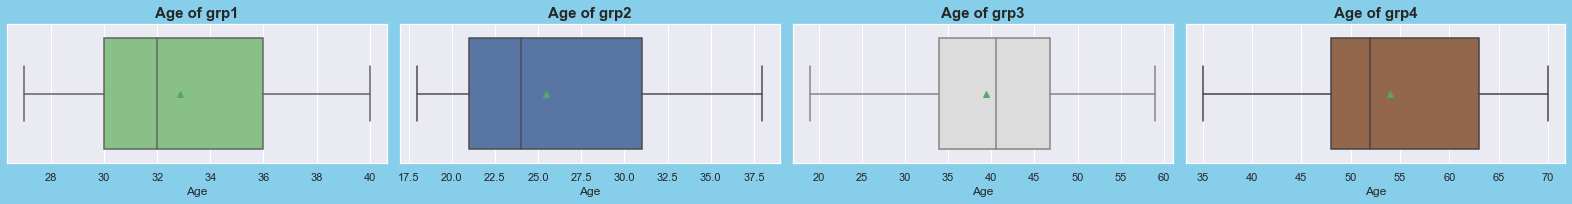

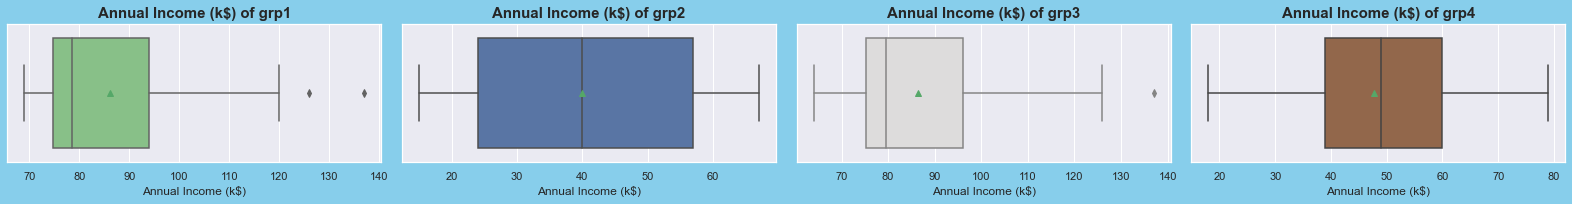

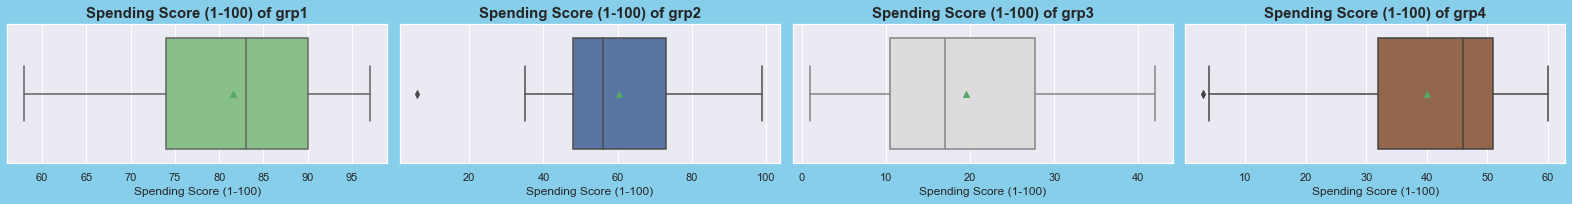

In [332]:
group_plot()

In [333]:
def scatter_mul1(col1,col2,col3,data1=data,palette1="tab10"):
    data=data1
    plt.figure(figsize=(22,4))
    sb.scatterplot(data[col1],data[col2],hue=data[col3],palette=palette1)
    c=col3+" wise "+col1+" VS "+col2
    plt.xlabel(col1)
    plt.title(c,fontsize=15,fontweight="bold")
    plt.show()

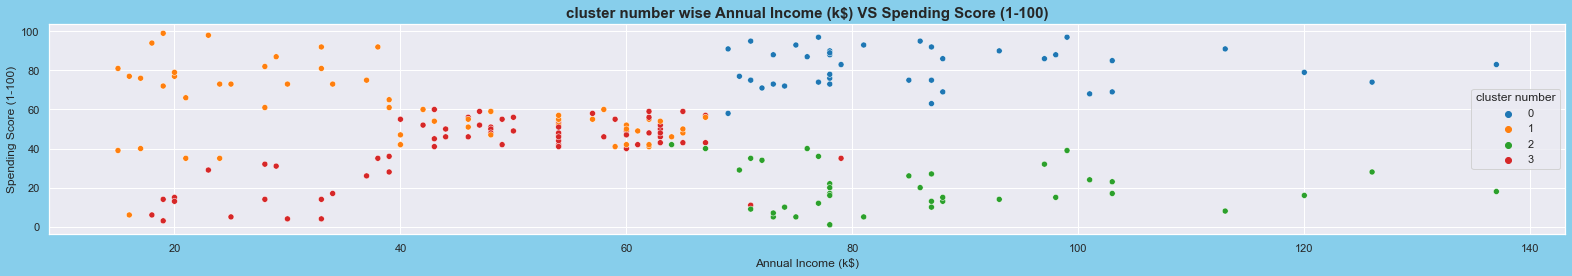

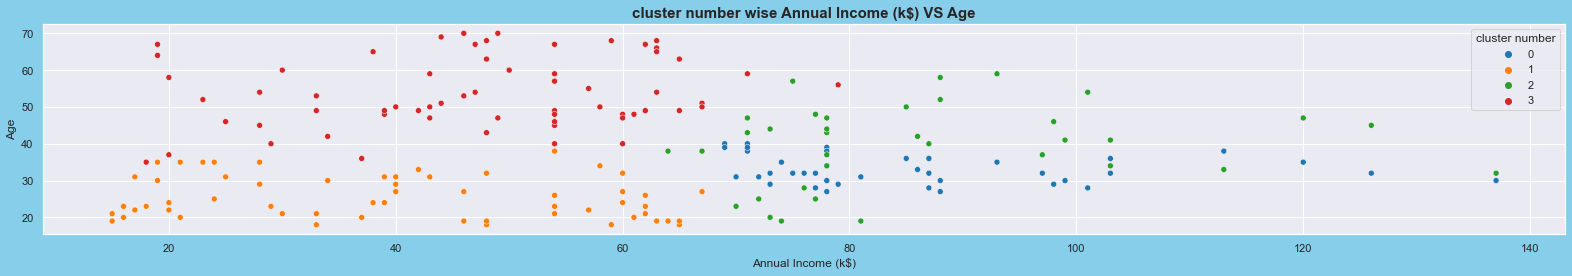

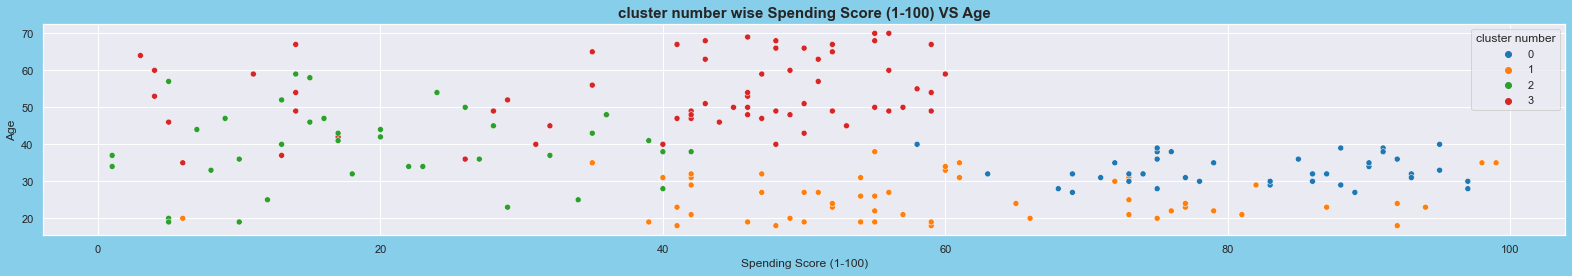

In [334]:
##plt.subplots(3,1,figsize=(20,10))
##plt.subplot(311)
scatter_mul1('Annual Income (k$)','Spending Score (1-100)','cluster number',kmeans_df)
##sb.scatterplot(kmeans_df['Annual Income (k$)'],kmeans_df['Spending Score (1-100)'],hue=kmeans_df['cluster number'],palette="tab10")
##plt.subplot(312)

scatter_mul1('Annual Income (k$)','Age','cluster number',kmeans_df)
##sb.scatterplot(kmeans_df['Annual Income (k$)'],kmeans_df['Age'],hue=kmeans_df['cluster number'],palette="tab10")
##plt.subplot(313)
scatter_mul1('Spending Score (1-100)','Age','cluster number',kmeans_df)
##sb.scatterplot(kmeans_df['Spending Score (1-100)'],kmeans_df['Age'],hue=kmeans_df['cluster number'],palette="tab10")


-------------------------------------------------------------------------

# Agglomerative Clustering

--------------------------------------------------------------

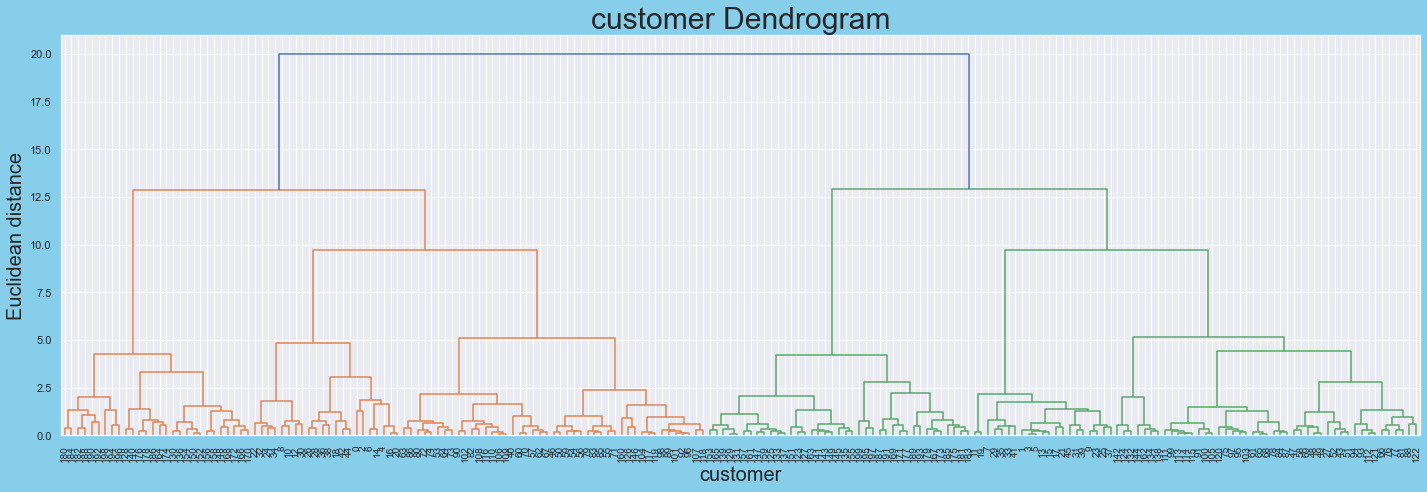

In [335]:
plt.figure(figsize=(20,7))
dendogram=sch.dendrogram(sch.linkage(x.values,method="ward"),labels=x.index)
ax=plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('customer Dendrogram',fontsize=30)
plt.xlabel('customer',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show();

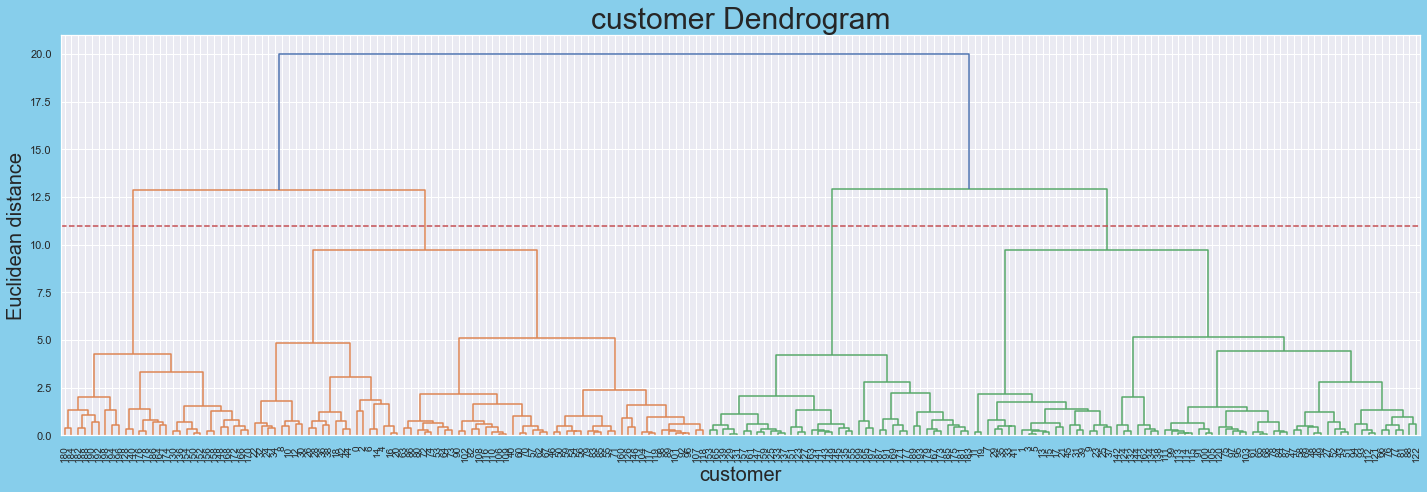

In [336]:
plt.figure(figsize=(20,7))
dendogram=sch.dendrogram(sch.linkage(x.values,method="ward"),labels=x.index)
plt.axhline(y=11.0, color='r', linestyle='--')
ax=plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('customer Dendrogram',fontsize=30)
plt.xlabel('customer',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show();

In [337]:
from scipy.spatial.distance import euclidean
hc=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")
y_hc=hc.fit_predict(x)
y_hc

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       1, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int64)

In [338]:
agglo_df=pd.concat([data1,pd.DataFrame(y_hc)],axis=1)
agglo_df=agglo_df.rename(columns={0:'cluster number'})
agglo_df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster number
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1


In [339]:
agglo_df1=agglo_df

In [340]:
##agglo_df.drop(['CustomerID','Gender'],axis=1,inplace=True)

In [341]:
agglo_df0=agglo_df[agglo_df["cluster number"]==0]
agglo_df1=agglo_df[agglo_df["cluster number"]==1]
agglo_df2=agglo_df[agglo_df["cluster number"]==2]
agglo_df3=agglo_df[agglo_df["cluster number"]==3]

In [342]:
print("----------------------------------------------------------1st Cluster statistics----------------------------------------------------")
agglo_df0.describe().T
print("----------------------------------------------------------2nd Cluster statistics----------------------------------------------------")
agglo_df1.describe().T
print("----------------------------------------------------------3rd Cluster statistics----------------------------------------------------")
agglo_df2.describe().T
print("----------------------------------------------------------4th Cluster statistics----------------------------------------------------")
agglo_df3.describe().T

----------------------------------------------------------1st Cluster statistics----------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
CustomerID,67.0,65.492537,38.459098,1.0,34.0,64.0,95.0,161.0
Age,67.0,52.432836,11.469622,19.0,47.5,51.0,61.5,70.0
Annual Income (k$),67.0,45.597015,16.677021,15.0,33.0,47.0,60.0,79.0
Spending Score (1-100),67.0,39.134328,16.166647,3.0,33.5,43.0,50.5,60.0
cluster number,67.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


----------------------------------------------------------2nd Cluster statistics----------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
CustomerID,66.0,70.545455,42.421759,2.0,34.50,69.5,103.25,163.0
Age,66.0,26.560606,7.043008,18.0,21.00,24.5,31.00,45.0
Annual Income (k$),66.0,47.363636,18.328319,15.0,33.00,48.0,62.00,81.0
Spending Score (1-100),66.0,56.787879,20.628222,5.0,46.25,55.0,73.00,99.0
cluster number,66.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


----------------------------------------------------------3rd Cluster statistics----------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
CustomerID,39.0,162.000000,22.803509,124.0,143.0,162.0,181.0,200.0
Age,39.0,32.692308,3.728650,27.0,30.0,32.0,35.5,40.0
Annual Income (k$),39.0,86.538462,16.312485,69.0,75.5,79.0,95.0,137.0
Spending Score (1-100),39.0,82.128205,9.364489,63.0,74.5,83.0,90.0,97.0
cluster number,39.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


----------------------------------------------------------4th Cluster statistics----------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
CustomerID,28.0,169.214286,20.413063,129.0,154.50,172.0,185.50,199.0
Age,28.0,43.892857,8.337063,32.0,36.75,43.5,47.75,59.0
Annual Income (k$),28.0,91.285714,16.915601,71.0,78.00,87.0,99.50,137.0
Spending Score (1-100),28.0,16.678571,8.973432,1.0,10.75,16.0,22.25,39.0
cluster number,28.0,3.000000,0.000000,3.0,3.00,3.0,3.00,3.0


In [343]:
def group_plot_agglo():
    for col in ['Age','Annual Income (k$)','Spending Score (1-100)']:
        plt.figure(figsize=(22,3))
        plt.subplot(141)
        sb.boxplot(agglo_df0[col])
        plt.title(col+" of grp1",fontsize=15,fontweight="bold")
        plt.subplot(142)
        sb.boxplot(agglo_df1[col])
        plt.title(col+" of grp2",fontsize=15,fontweight="bold")
        plt.subplot(143)
        sb.boxplot(agglo_df2[col])
        plt.title(col+" of grp3",fontsize=15,fontweight="bold")
        plt.subplot(144)
        sb.boxplot(agglo_df3[col])
        plt.title(col+" of grp4",fontsize=15,fontweight="bold")
        plt.show()

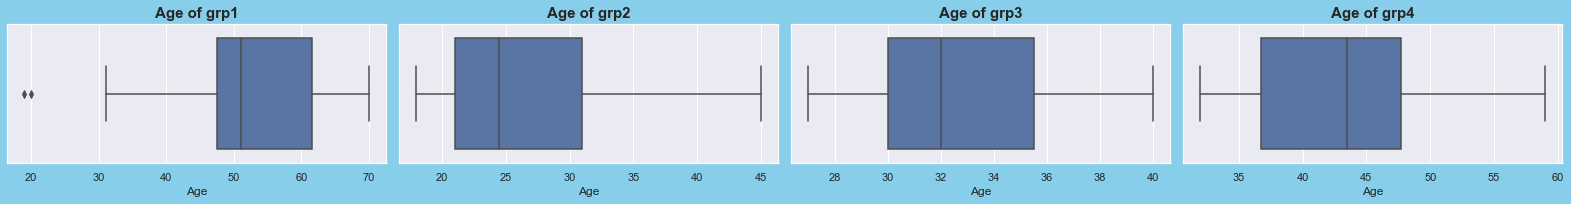

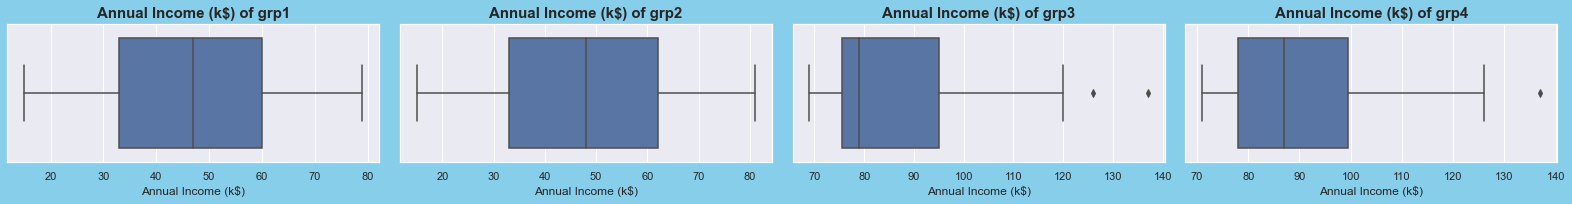

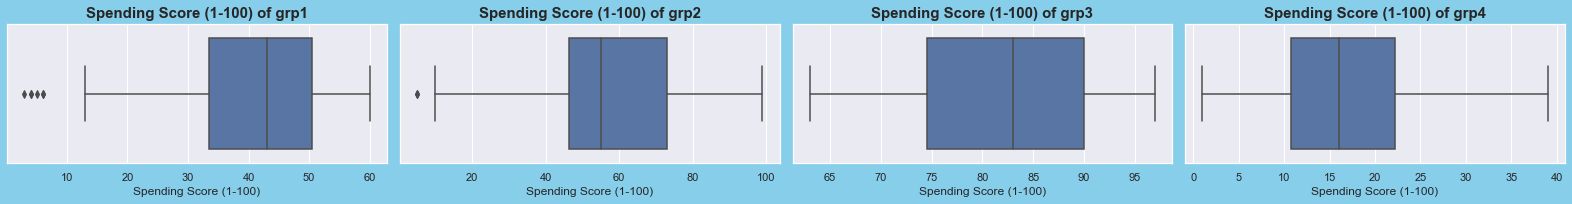

In [344]:
group_plot_agglo()

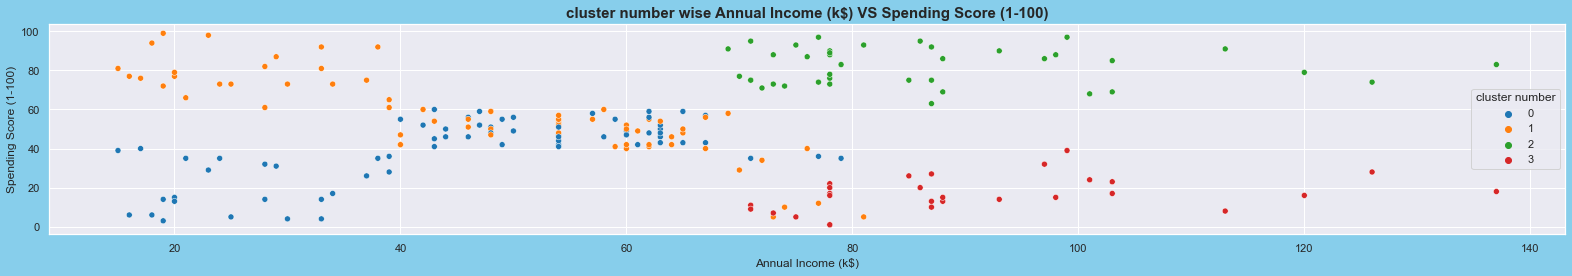

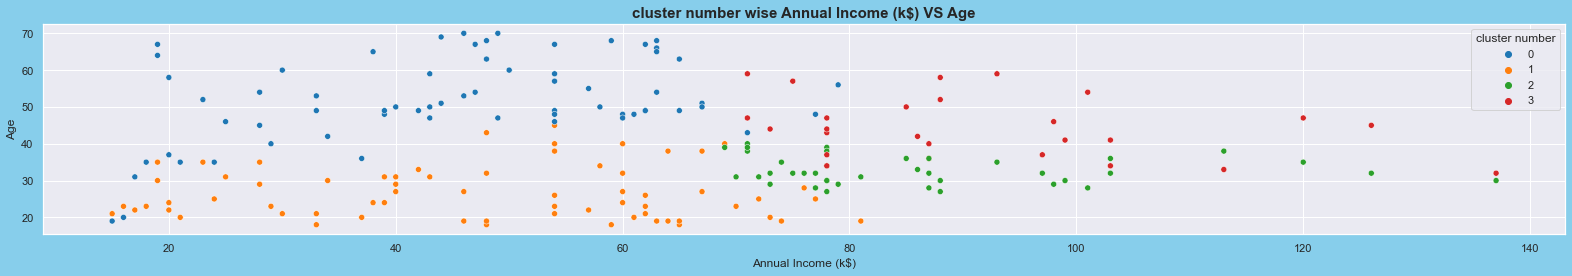

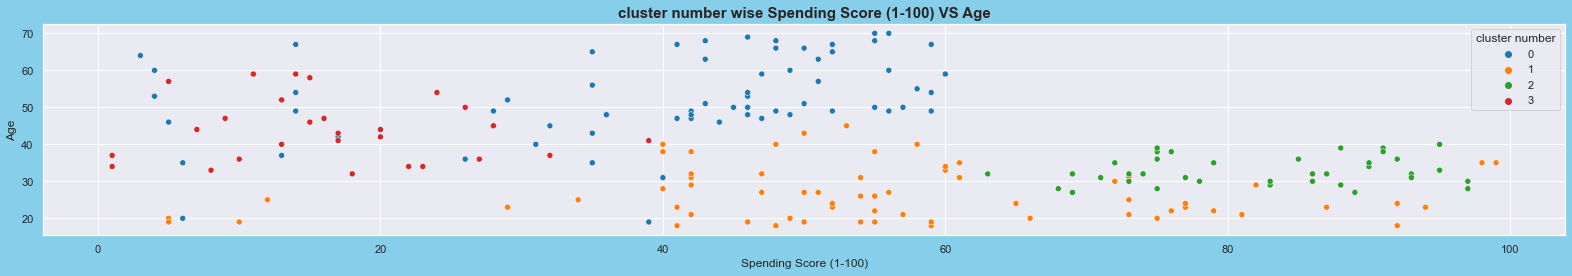

In [345]:
scatter_mul1('Annual Income (k$)','Spending Score (1-100)','cluster number',agglo_df)
##sb.scatterplot(kmeans_df['Annual Income (k$)'],kmeans_df['Spending Score (1-100)'],hue=kmeans_df['cluster number'],palette="tab10")
##plt.subplot(312)

scatter_mul1('Annual Income (k$)','Age','cluster number',agglo_df)
##sb.scatterplot(kmeans_df['Annual Income (k$)'],kmeans_df['Age'],hue=kmeans_df['cluster number'],palette="tab10")
##plt.subplot(313)
scatter_mul1('Spending Score (1-100)','Age','cluster number',agglo_df)

In [346]:
silhouette_score(x,y_hc)

0.3614512741691407

------------------------------------------------------------------------------------------------

# DBSCAN

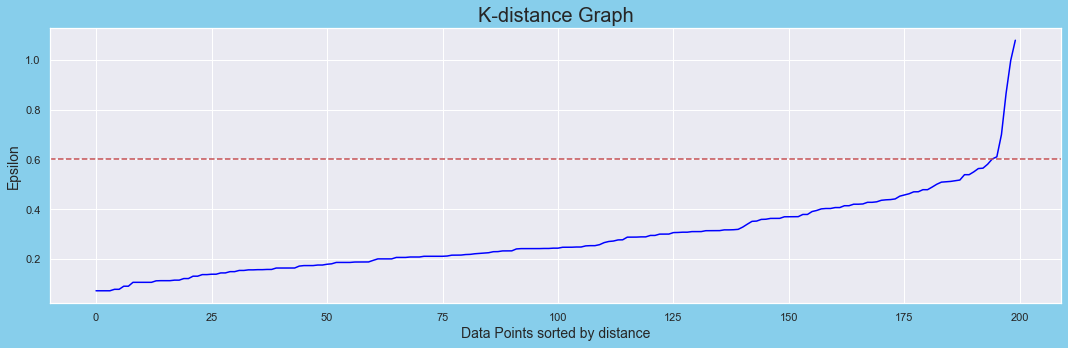

In [347]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4).fit(x)
distances, indices = neigh.kneighbors(x)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,5))
plt.plot(distances,color='blue')
plt.axhline(y=0.6, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show();

In [348]:
from sklearn.cluster import DBSCAN

In [349]:
eps=0.6
for min_samples in range(2,11):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(x)

    x1= cluster_labels +2
    y1 = np.bincount(x1)
    ii = np.nonzero(y1)[0]
    results = list(zip(ii,y1[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ',results)

eps= 0.6 | min_samples=  2 | obtained clustering:  [(1, 6), (2, 143), (3, 2), (4, 2), (5, 39), (6, 2), (7, 4), (8, 2)]
eps= 0.6 | min_samples=  3 | obtained clustering:  [(1, 14), (2, 143), (3, 39), (4, 4)]
eps= 0.6 | min_samples=  4 | obtained clustering:  [(1, 18), (2, 142), (3, 36), (4, 4)]
eps= 0.6 | min_samples=  5 | obtained clustering:  [(1, 28), (2, 137), (3, 35)]
eps= 0.6 | min_samples=  6 | obtained clustering:  [(1, 34), (2, 105), (3, 5), (4, 4), (5, 34), (6, 18)]
eps= 0.6 | min_samples=  7 | obtained clustering:  [(1, 50), (2, 51), (3, 53), (4, 34), (5, 12)]
eps= 0.6 | min_samples=  8 | obtained clustering:  [(1, 52), (2, 50), (3, 52), (4, 34), (5, 12)]
eps= 0.6 | min_samples=  9 | obtained clustering:  [(1, 65), (2, 19), (3, 53), (4, 29), (5, 34)]
eps= 0.6 | min_samples=  10 | obtained clustering:  [(1, 66), (2, 19), (3, 51), (4, 30), (5, 34)]


In [350]:
dbscan_model=DBSCAN(eps=0.6,min_samples=4)
y_pred1=dbscan_model.fit_predict(x)
y_pred1

array([-1,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  1,  0,  1,  0,  1, -1,  1,  0,  1,  0,  1,  2,  1,
        0,  1,  2,  1, -1,  1,  0,  1,  2,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  2,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1, -1,
        1,  0,  1,  0,  1, -1,  1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [351]:
x['DBSCAN_modellabels']=dbscan_model.labels_
x['DBSCAN_modellabels'].value_counts()

 0    142
 1     36
-1     18
 2      4
Name: DBSCAN_modellabels, dtype: int64

In [352]:
x1=x[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [353]:
sc=StandardScaler()
obj = scalar.fit(data)
x_scaledback=obj.inverse_transform(x1)
X1=pd.DataFrame(x_scaledback,columns=x1.columns)
X1.head()
X1.shape

,Age,Annual Income (k$),Spending Score (1-100)
0,19.0,15.0,39.0
1,21.0,15.0,81.0
2,20.0,16.0,6.0
3,23.0,16.0,77.0
4,31.0,17.0,40.0


(200, 3)

In [354]:
X1=pd.concat([X1,x['DBSCAN_modellabels']],axis=1)

In [355]:
X1.head()

,Age,Annual Income (k$),Spending Score (1-100),DBSCAN_modellabels
0,19.0,15.0,39.0,-1
1,21.0,15.0,81.0,0
2,20.0,16.0,6.0,-1
3,23.0,16.0,77.0,0
4,31.0,17.0,40.0,0


In [356]:
X2=pd.concat([X1,data1["CustomerID"]],axis=1)

In [357]:
dbscan_outlier=X1[X1["DBSCAN_modellabels"]==-1]
dbscan0=X1[X1["DBSCAN_modellabels"]==0]
dbscan1=X1[X1["DBSCAN_modellabels"]==1]
dbscan2=X1[X1["DBSCAN_modellabels"]==2]

In [358]:
print("----------------------------------------------------------1st Cluster statistics----------------------------------------------------")
dbscan_outlier.describe().T
print("----------------------------------------------------------2nd Cluster statistics----------------------------------------------------")
dbscan0.describe().T
print("----------------------------------------------------------3rd Cluster statistics----------------------------------------------------")
dbscan1.describe().T
print("----------------------------------------------------------4th Cluster statistics----------------------------------------------------")
dbscan2.describe().T

----------------------------------------------------------1st Cluster statistics----------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Age,18.0,39.555556,12.998743,19.0,32.25,35.0,46.5,67.0
Annual Income (k$),18.0,73.611111,49.353633,15.0,19.25,73.0,120.0,137.0
Spending Score (1-100),18.0,37.722222,34.187727,5.0,11.50,21.0,70.0,99.0
DBSCAN_modellabels,18.0,-1.000000,0.000000,-1.0,-1.00,-1.0,-1.0,-1.0


----------------------------------------------------------2nd Cluster statistics----------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Age,142.0,40.823944,15.110608,18.0,27.0,41.0,50.75,70.0
Annual Income (k$),142.0,52.746479,20.686254,15.0,39.0,54.0,64.00,103.0
Spending Score (1-100),142.0,44.802817,20.302059,1.0,35.0,47.0,55.75,94.0
DBSCAN_modellabels,142.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0


----------------------------------------------------------3rd Cluster statistics----------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Age,36.0,32.722222,3.836748,27.0,30.00,32.0,36.00,40.0
Annual Income (k$),36.0,83.111111,11.295455,69.0,74.75,78.0,88.00,113.0
Spending Score (1-100),36.0,82.416667,9.640317,63.0,74.75,85.5,90.25,97.0
DBSCAN_modellabels,36.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


----------------------------------------------------------4th Cluster statistics----------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Age,4.0,20.75,2.872281,19.0,19.00,19.5,21.25,25.0
Annual Income (k$),4.0,76.25,3.593976,73.0,73.75,75.5,78.00,81.0
Spending Score (1-100),4.0,8.00,3.559026,5.0,5.00,7.5,10.50,12.0
DBSCAN_modellabels,4.0,2.00,0.000000,2.0,2.00,2.0,2.00,2.0


In [359]:
def group_plot_dbscan():
    for col in ['Age','Annual Income (k$)','Spending Score (1-100)']:
        plt.figure(figsize=(22,3))
        plt.subplot(141)
        sb.boxplot(dbscan0[col])
        plt.title(col+" of grp1",fontsize=15,fontweight="bold")
        plt.subplot(142)
        sb.boxplot(dbscan1[col])
        plt.title(col+" of grp2",fontsize=15,fontweight="bold")
        plt.subplot(143)
        sb.boxplot(dbscan2[col])
        plt.title(col+" of grp3",fontsize=15,fontweight="bold")
        plt.show()

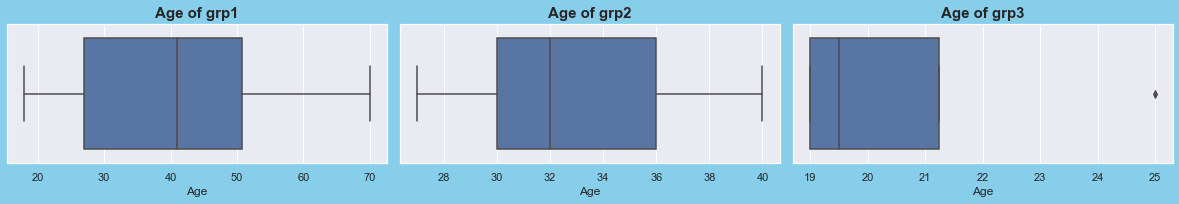

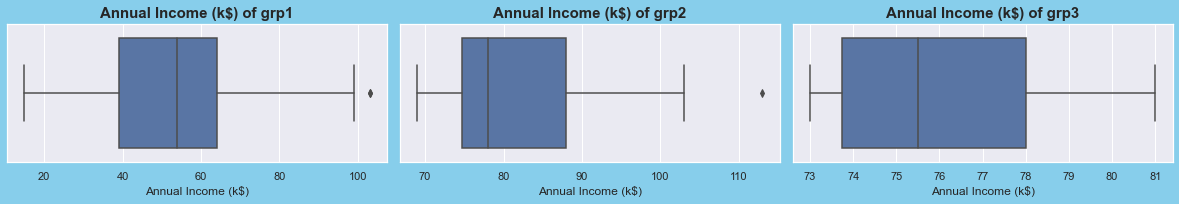

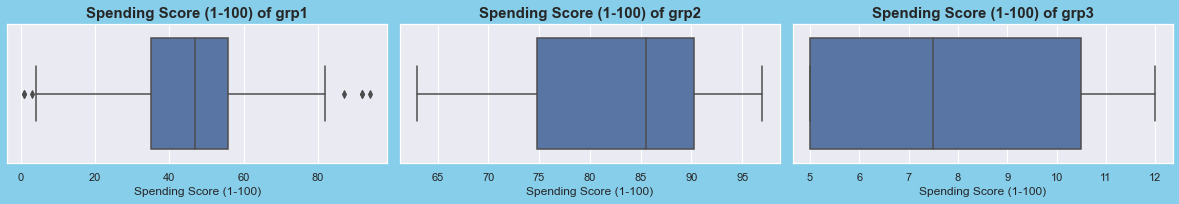

In [360]:
group_plot_dbscan()

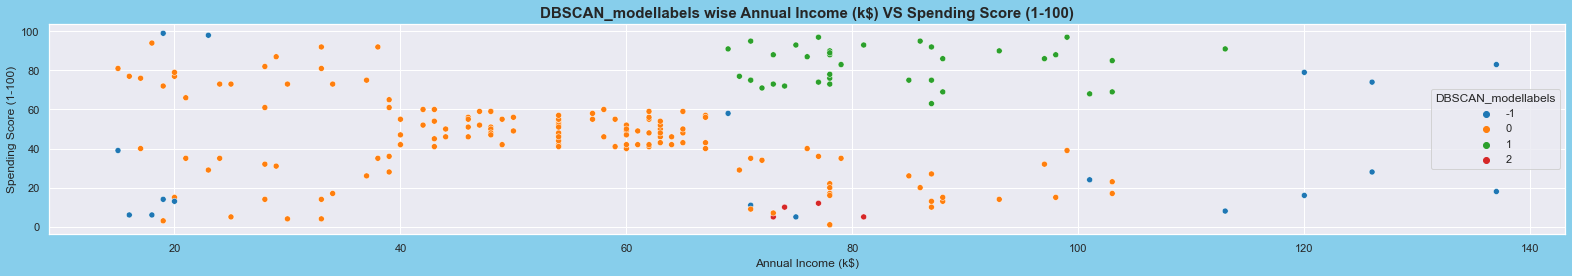

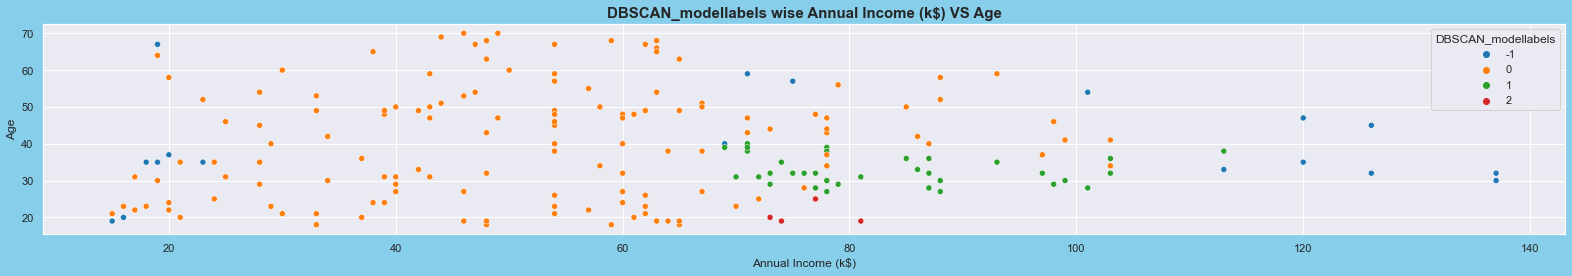

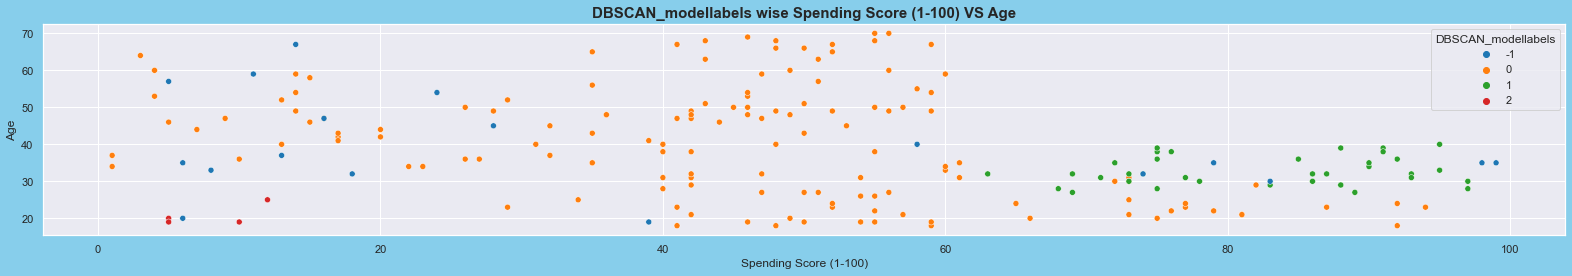

In [393]:
scatter_mul1('Annual Income (k$)','Spending Score (1-100)','DBSCAN_modellabels',X1)
scatter_mul1('Annual Income (k$)','Age','DBSCAN_modellabels',X1)
scatter_mul1('Spending Score (1-100)','Age','DBSCAN_modellabels',X1)

In [362]:
silhouette_score(x1,y_pred1)

0.15527415663221333

----------------------------------------------------------------------

# EVALUATION

In [363]:
dic={"KMEANS":0.40395827851,"AGGLOMERATIVE CLAUSTERING":0.3614512741691407,"DBSCAN":0.155}

In [364]:
pd.DataFrame(dic,index=["Silhoutte score"])

,KMEANS,AGGLOMERATIVE CLAUSTERING,DBSCAN
Silhoutte score,0.403958,0.361451,0.155


- here k means silhoutte score is more

## Final visulalization

-----------------------------------------------------------------------------------------------------------

## Age vs annual income

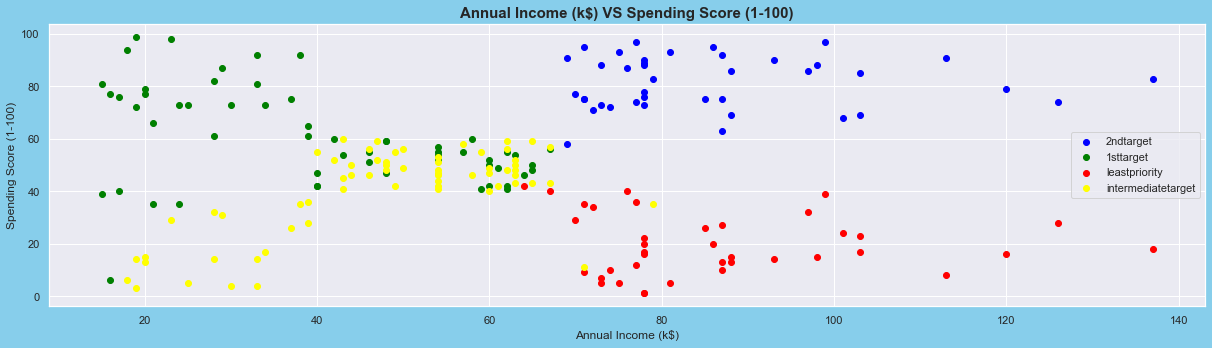

In [365]:
plt.figure(figsize=(17,5))
plt.scatter(kmeans_df0['Annual Income (k$)'],kmeans_df0['Spending Score (1-100)'],c="blue",label="2ndtarget")
plt.scatter(kmeans_df1['Annual Income (k$)'],kmeans_df1['Spending Score (1-100)'],c="green",label="1sttarget")
plt.scatter(kmeans_df2['Annual Income (k$)'],kmeans_df2['Spending Score (1-100)'],c="red",label="leastpriority")
plt.scatter(kmeans_df3['Annual Income (k$)'],kmeans_df3['Spending Score (1-100)'],c="yellow",label="intermediatetarget")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income (k$) VS Spending Score (1-100)",fontsize=15,fontweight="bold")
plt.legend()
plt.show();
##sb.scatterplot(kmeans_df1['Annual Income (k$)'],kmeans_df1['Spending Score (1-100)'],hue=kmeans_df1['Age'],style=kmeans_df1['Gender'],palette="Blues")
##sb.scatterplot(kmeans_df2['Annual Income (k$)'],kmeans_df2['Spending Score (1-100)'],hue=kmeans_df2['Age'],style=kmeans_df2['Gender'],palette="Reds")
##sb.scatterplot(kmeans_df3['Annual Income (k$)'],kmeans_df3['Spending Score (1-100)'],hue=kmeans_df3['Age'],style=kmeans_df3['Gender'],palette="Greens")

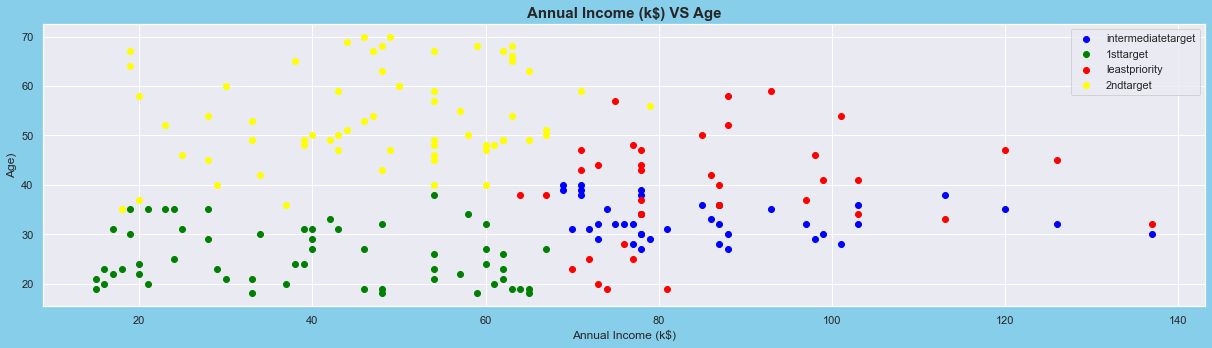

In [366]:
plt.figure(figsize=(17,5))
plt.scatter(kmeans_df0['Annual Income (k$)'],kmeans_df0['Age'],c="blue",label="intermediatetarget")
plt.scatter(kmeans_df1['Annual Income (k$)'],kmeans_df1['Age'],c="green",label="1sttarget")
plt.scatter(kmeans_df2['Annual Income (k$)'],kmeans_df2['Age'],c="red",label="leastpriority")
plt.scatter(kmeans_df3['Annual Income (k$)'],kmeans_df3['Age'],c="yellow",label="2ndtarget")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Age)")
plt.title("Annual Income (k$) VS Age",fontsize=15,fontweight="bold")
plt.legend()
plt.show();

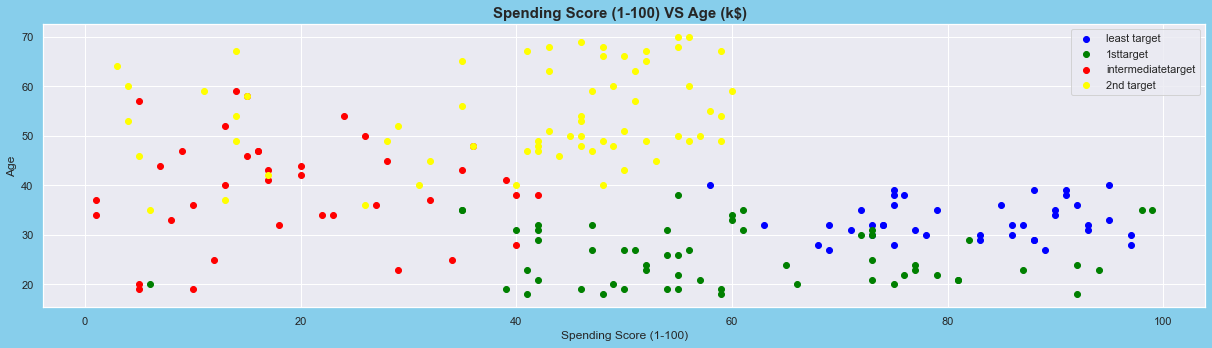

In [367]:
plt.figure(figsize=(17,5))
plt.scatter(kmeans_df0['Spending Score (1-100)'],kmeans_df0['Age'],c="blue",label="least target")
plt.scatter(kmeans_df1['Spending Score (1-100)'],kmeans_df1['Age'],c="green",label="1sttarget")
plt.scatter(kmeans_df2['Spending Score (1-100)'],kmeans_df2['Age'],c="red",label="intermediatetarget")
plt.scatter(kmeans_df3['Spending Score (1-100)'],kmeans_df3['Age'],c="yellow",label="2nd target")
plt.ylabel("Age")
plt.xlabel("Spending Score (1-100)")
plt.title("Spending Score (1-100) VS Age (k$)  ",fontsize=15,fontweight="bold")
plt.legend()
plt.show();

### CLUSTERS SATISTICS WITH BOXPLOT

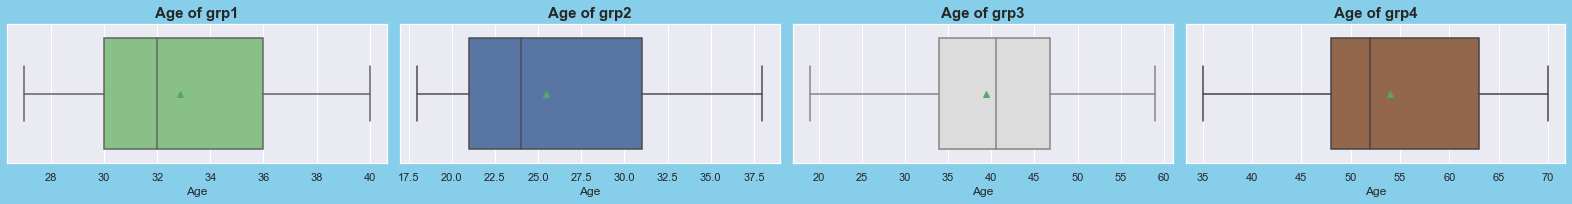

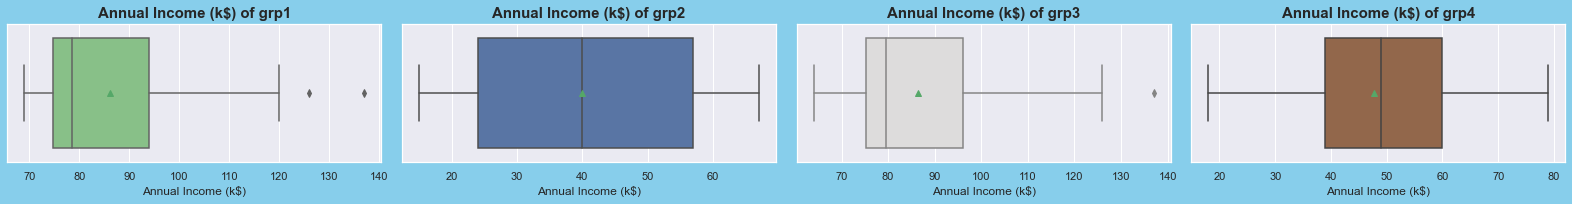

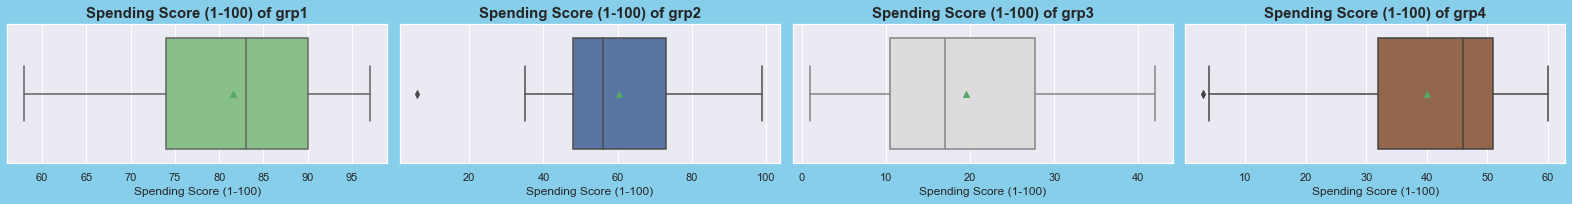

In [371]:
group_plot(22,3)

In [382]:
dic1={"range":["27 - 40","69-137","58 - 97"],"skewed":["slighly right skewed","rightskew","slightly left skewed"],"75%":[">29",">75k$",">74"]}
grp1=pd.DataFrame(dic1,index=["AGE","ANNUAL INCOME","SPENDING SCORE"]).T
grp1

,AGE,ANNUAL INCOME,SPENDING SCORE
range,27 - 40,69-137,58 - 97
skewed,slighly right skewed,rightskew,slightly left skewed
75%,>29,>75k$,>74


In [384]:
dic2={"range":["18 - 38","15 - 67","35-99"],"skewed":["slighly right skewed","no skew","slightly right skewed"],"75%":[">21",">24k$",">48"]}
grp2=pd.DataFrame(dic2,index=["AGE","ANNUAL INCOME","SPENDING SCORE"]).T
grp2

,AGE,ANNUAL INCOME,SPENDING SCORE
range,18 - 38,15 - 67,35-99
skewed,slighly right skewed,no skew,slightly rightt skewed
75%,>21,>24k$,>48


In [387]:
dic3={"range":["19 - 59","64- 137","1 - 42"],"skewed":["slighly left skewed","right skewed","rightt skewed"],"75%":[">34",">75k$",">10.50"]}
grp3=pd.DataFrame(dic3,index=["AGE","ANNUAL INCOME","SPENDING SCORE"]).T
grp3

,AGE,ANNUAL INCOME,SPENDING SCORE
range,19 - 59,64- 137,1 - 42
skewed,slighly left skewed,right skewed,rightt skewed
75%,>34,>75k$,>10.50


In [389]:
dic4={"range":["35 - 70","18 - 79","3 -60"],"skewed":["right skewed","slighly left skew","left skewed"],"75%":[">48",">39k$",">32"]}
grp4=pd.DataFrame(dic4,index=["AGE","ANNUAL INCOME","SPENDING SCORE"]).T
grp4

,AGE,ANNUAL INCOME,SPENDING SCORE
range,35 - 70,18 - 79,3 -60
skewed,right skewed,slighly left skew,left skewed
75%,>48,>39k$,>32


In [369]:
print("The customerID of the Group1 :-",kmeans_df_all[kmeans_df_all["cluster number"]==0][['CustomerID']].values.ravel())
print("The customerID of the Group2 :-",kmeans_df_all[kmeans_df_all["cluster number"]==1][['CustomerID']].values.ravel())
print("The customerID of the Group3 :-",kmeans_df_all[kmeans_df_all["cluster number"]==2][['CustomerID']].values.ravel())
print("The customerID of the Group4 :-",kmeans_df_all[kmeans_df_all["cluster number"]==3][['CustomerID']].values.ravel())

The customerID of the Group1 :- [123 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156
 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192
 194 196 198 200]
The customerID of the Group2 :- [  1   2   3   4   5   6   8  10  12  14  16  17  18  20  21  22  24  26
  28  30  32  34  36  38  40  42  44  46  48  49  50  52  53  59  62  66
  69  70  76  79  82  85  88  89  92  95  96  98 100 101 104 106 112 114
 115 116 121]
The customerID of the Group3 :- [113 122 125 127 131 133 135 137 139 141 143 145 147 149 151 153 155 157
 159 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195
 197 199]
The customerID of the Group4 :- [  7   9  11  13  15  19  23  25  27  29  31  33  35  37  39  41  43  45
  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72  73  74
  75  77  78  80  81  83  84  86  87  90  91  93  94  97  99 102 103 105
 107 108 109 110 111 117 118 119 120 129 161]


In [ ]:
dic=[]

## Based on the analysis Kmeans outperform Agglomerative claustering and dbsan for mall customer segmentation

## Business conclusion

#### GRP1 customers is the first target because of their high annual salary  and spending score is more,
#### GRP3 customers is the  2nd target because their high annual salary and low spending score
####  Grp2 customers is the next intermediate target thir annual salry,spending score small to medium 
#### Grp4 customers is last priority because their annual salary is annual salry,spending score small to medium  and spending score is low

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------